In [1]:
import sys
sys.path.append('../dl1')
import os
import shutil
import h5py
from eventlist_v5 import Eventlist
from snapeventlist import EventlistSnapshot
import matplotlib.pyplot as plt
import tables as tb
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [25, 10]

## __Test__
* DLO: `wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.h5`
    * single event: `dl0_id=18` and `dl1_id=18`
    * double event: `dl0_id=315` and `dl1_id=315`


In [2]:
# List of files in directory /data01
os.listdir('/data01')

['output',
 'wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.h5',
 'wf_runId_00240_configId_00000_2022-10-10T08_21_49.133517.h5',
 'wf_runId_00249_configId_00000_2022-10-17T09_45_54.710368.h5',
 'wf_runId_00261_configId_00000_2022-10-24T08_30_50.143648.h5']

In [3]:
h5_file_name = os.listdir('/data01')[1]

In [4]:
dl1_path = os.path.join(os.path.dirname(os.getcwd()), 'dl1')
# Filepath for dl0 and dl1
filePath_dl0 = f"/data01/{h5_file_name}"
filePath_dl1 = os.path.join(os.path.join(dl1_path, 'output_dl1'), 
                            os.path.basename(filePath_dl0).replace('.h5', '.dl1.h5')) 
# Output dir for dl2
outputdir=os.path.join(dl1_path, 'output_dl2_abcd')
outputdir0_old=os.path.join(dl1_path, 'output_dl2_fromdl0_old')
outputdir0=os.path.join(dl1_path, 'output_dl2_fromdl0')
outputdir1=os.path.join(dl1_path, 'output_dl2_fromdl1')
print(filePath_dl0)
print(filePath_dl1)

/data01/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.h5
/home/usergamma/workspace/dl1/output_dl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.h5


In [5]:
# cmd = f"python ../dl1/dl02dl1.py {filePath_dl0} {dl1_path}/output_dl1"
# !echo $ {cmd}
# !{cmd}

In [6]:
eventlist_dl0 = Eventlist()
eventlist_dl1 = Eventlist(from_dl1=True)

### __DL0 smaple example__

In [7]:
# if os.path.exists(outputdir):
#     shutil.rmtree(outputdir)
# eventlist_dl0.process_file(filePath_dl0, None, outputdir, True, 486, 486)

Processing /home/usergamma/workspace/dl1/output_dl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_abcd/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.dl2.h5' non esiste.


  0%|          | 0/490 [00:00<?, ?it/s]

 96%|█████████▌| 468/490 [00:10<00:00, 232.14it/s]

recupero mean value and stdev
Waveform num. 489 ##############################
la waveform num. 489 ha i seguenti peaks: [1199] e mean value 42.19 and stdev 4.175392197147473


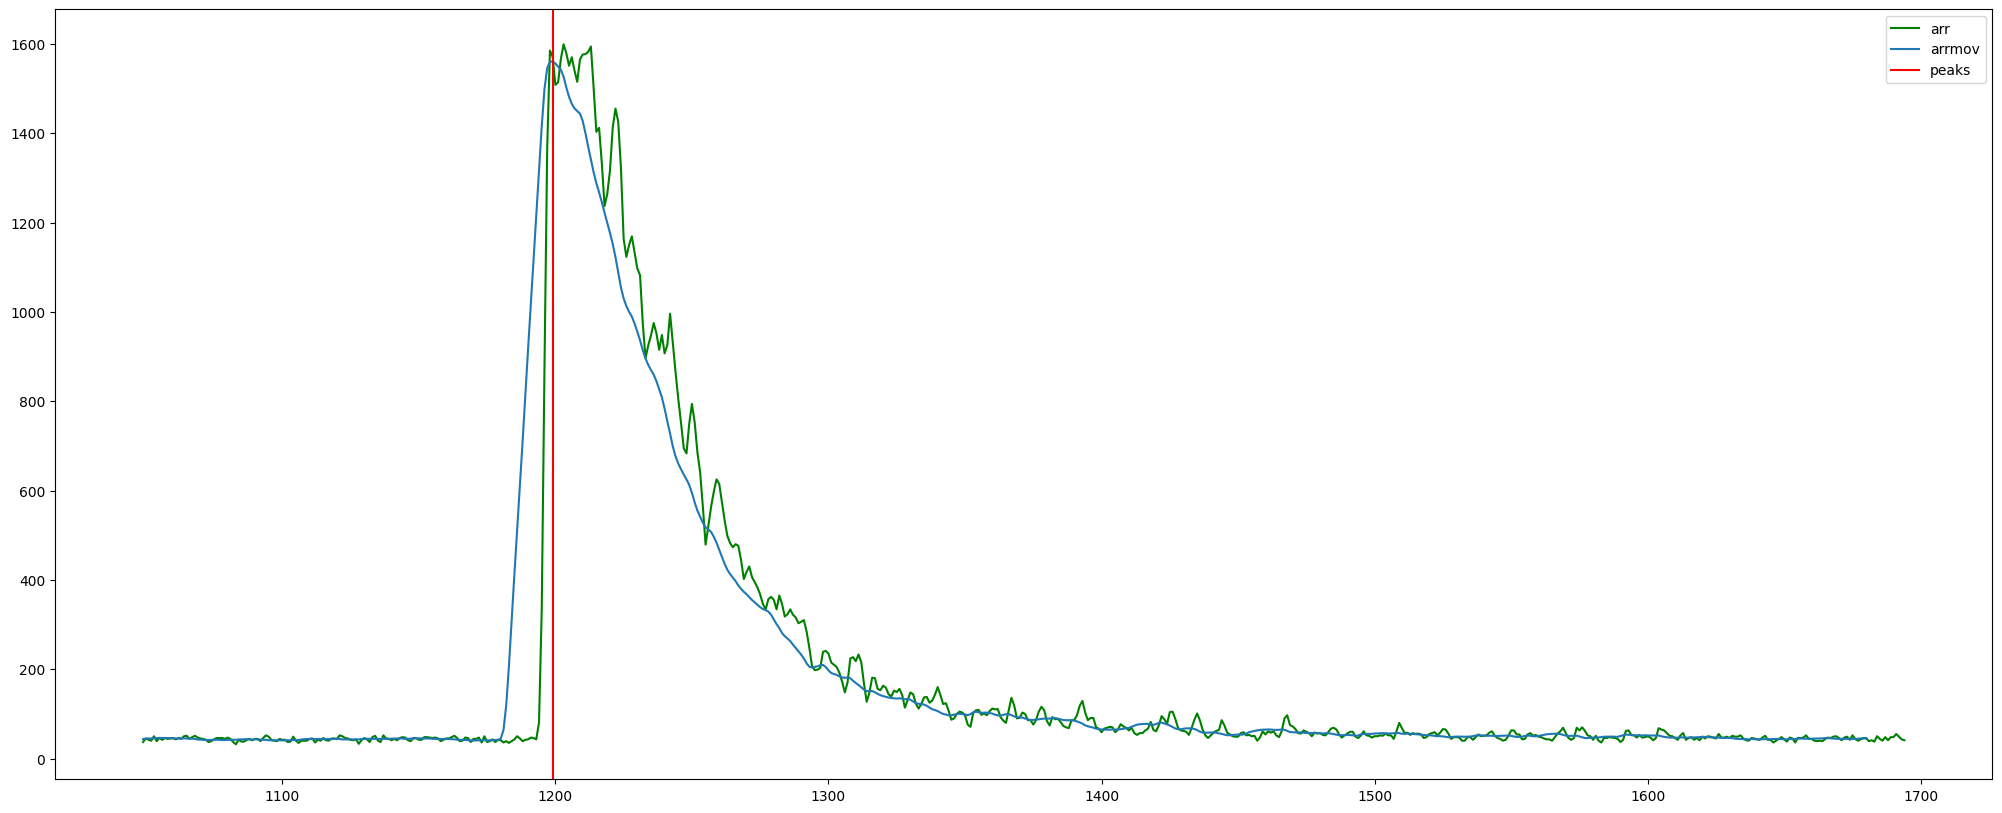

integral 94140.82999999996
integralMM 94148.00666666665
integralEXP 90509.14912974299


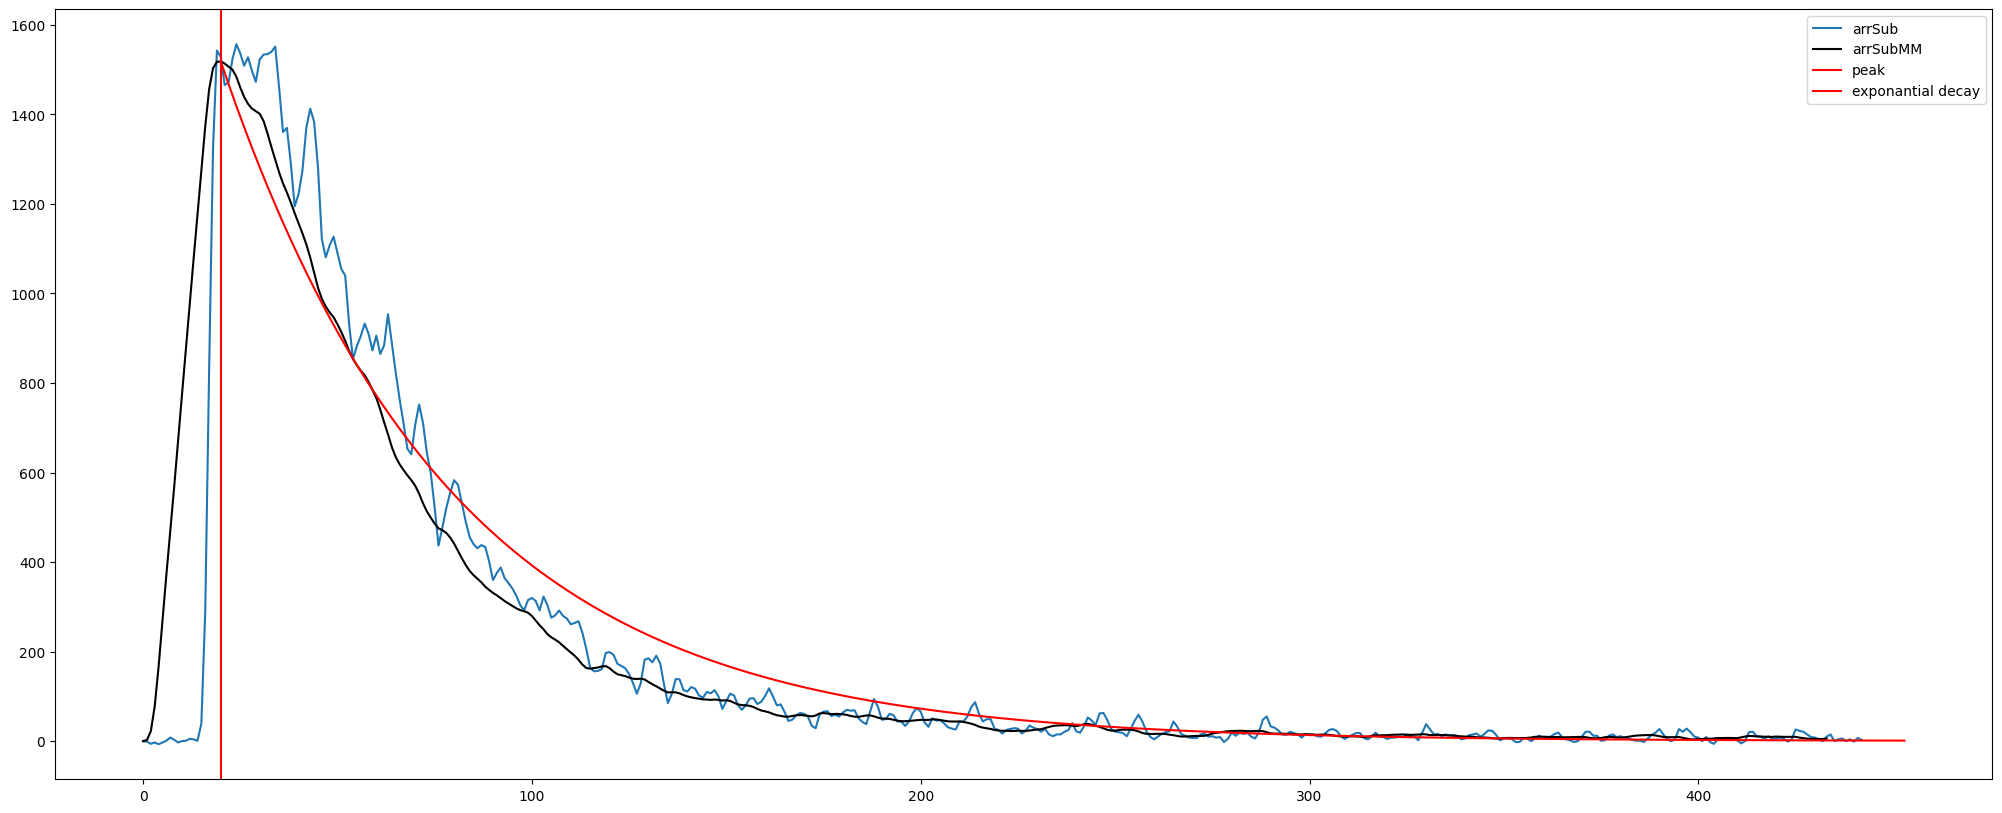

100%|██████████| 490/490 [00:11<00:00, 42.02it/s] 


In [8]:
# if os.path.exists(outputdir):
#     shutil.rmtree(outputdir)
eventlist_dl1.process_file(filePath_dl1, None, outputdir, True, 489, 489)

### __DL0 to DL2__

In [9]:
# if os.path.exists(outputdir0):
#     shutil.rmtree(outputdir0)
eventlist_dl0.process_file(filePath_dl0, None, outputdir0, False, 0, -1)

Processing /data01/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl0/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl2.h5' non esiste.


100%|██████████| 10000/10000 [01:15<00:00, 132.24it/s]


### __DL1 to DL2__

In [10]:
# if os.path.exists(outputdir1):
#     shutil.rmtree(outputdir1)
eventlist_dl1.process_file(filePath_dl1, None, outputdir1, False, 0, -1)

Processing /home/usergamma/workspace/dl1/output_dl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.dl2.h5' non esiste.


100%|██████████| 10129/10129 [00:56<00:00, 180.79it/s]


### __Check if the two DL2 file are the same__

In [11]:
filePath_dl0_old_dl2 = os.path.join(outputdir0_old, os.path.basename(filePath_dl0)).replace('h5', 'dl2.h5')
filePath_dl0_dl2     = os.path.join(outputdir0, os.path.basename(filePath_dl0)).replace('h5', 'dl2.h5')
filePath_dl1_dl2     = os.path.join(outputdir1, os.path.basename(filePath_dl1)).replace('h5', 'dl2.h5')
print(filePath_dl0_old_dl2)
print(filePath_dl0_dl2)
print(filePath_dl1_dl2)

/home/usergamma/workspace/dl1/output_dl2_fromdl0_old/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl2.h5
/home/usergamma/workspace/dl1/output_dl2_fromdl0/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl2.h5
/home/usergamma/workspace/dl1/output_dl2_fromdl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.dl2.h5


### __DL2 of DL0 vs DL2 of DL1__

In [12]:
cnt_pk_notfound_h50 = 0
cnt_pk_notfound_h51 = 0
cnt_len_h50 = 0
cnt_len_h51 = 0
with h5py.File(filePath_dl0_dl2, mode='r') as h50:
    cnt_len_h50 = len(h50['dl2']['eventlist'])
    evlst0 = h50['dl2']['eventlist']
    for data0 in evlst0:
        if -1 in data0:
            cnt_pk_notfound_h50 += 1
with h5py.File(filePath_dl1_dl2, mode='r') as h51:
    cnt_len_h51 = len(h51['dl2']['eventlist'])
    evlst1 = h51['dl2']['eventlist']
    for data1 in evlst1:
        if -1 in data1:
            cnt_pk_notfound_h51 += 1

print(f"len h5_0=            {cnt_len_h50}")
print(f"len h5_1=            {cnt_len_h51}")
print(f"pks_not_found h5_0=  {cnt_pk_notfound_h50}")
print(f"pks_not_found h5_1=  {cnt_pk_notfound_h51}")

len h5_0=            10133
len h5_1=            10133
pks_not_found h5_0=  63
pks_not_found h5_1=  63


In [13]:

with h5py.File(filePath_dl0_dl2, mode='r') as h5_0:
    with h5py.File(filePath_dl1_dl2, mode='r') as h5_1:
        i, j = 0, 0
        evlst0 = h5_0['dl2']['eventlist']
        evlst1 = h5_1['dl2']['eventlist']
        for data0, data1 in tqdm(zip(evlst0, evlst1), total=cnt_len_h50):
            if not data0==data1:
                print('dl0_2_dl2:', data0)
                print('dl1_2_dl2:', data1)
                # print('dl0_2_dl2 mult:', data0['mult'])
                # print('dl1_2_dl2 mult:', data1['mult'])
                print()

  1%|          | 55/10133 [00:00<00:18, 546.00it/s]

100%|██████████| 10133/10133 [00:07<00:00, 1326.14it/s]


In [14]:
# with tb.open_file(filePath_dl1, mode='r') as h5_out:
#     group = h5_out.get_node('/','waveforms')
#     for data1 in tqdm(group, total=group._g_getnchildren()):
#         if data1._v_attrs['original_wf'] == f'wf_{486:06d}':
#             print(data1._v_name)

# with h5py.File(filePath_dl1, mode='r') as h5_1:
#     for wf_idx in h5_1['/']['waveforms']:
#         originalwf_idx = str(h5_1['/']['waveforms'][wf_idx].attrs['original_wf']).replace('\'', '').replace('b', '')
#         if originalwf_idx == f'wf_{7720:06d}':
#             arr = h5_1['/']['waveforms'][wf_idx][-30:]
#             print('original wf', originalwf_idx, 'mean', arr.mean())
#             break

In [15]:
# with open(os.path.join(outputdir0_old, 'old_new___differences.txt'), 'w') as f_diff:
#     with h5py.File(filePath_dl0_old_dl2, mode='r') as h5_0:
#         with h5py.File(filePath_dl0_dl2, mode='r') as h5_1:
#             for data0, data1 in tqdm(zip(h5_0['dl2']['eventlist'], h5_1['dl2']['eventlist']), 
#                                     total=len(h5_1['dl2']['eventlist'])):
#                 if not data0==data1:
#                     f_diff.write(f'data0: {data0} data1: {data1}\n')

## __Final test__

In [2]:
def check_sameDL2(filePath_dl0_dl2,filePath_dl1_dl2 ):
    cnt_pk_notfound_h50 = 0
    cnt_pk_notfound_h51 = 0
    cnt_len_h50 = 0
    cnt_len_h51 = 0
    F_same = True
    # Check lenghts
    with h5py.File(filePath_dl0_dl2, mode='r') as h50:
        cnt_len_h50 = len(h50['dl2']['eventlist'])
        evlst0 = h50['dl2']['eventlist']
        for data0 in evlst0:
            if -1 in data0:
                cnt_pk_notfound_h50 += 1
    with h5py.File(filePath_dl1_dl2, mode='r') as h51:
        cnt_len_h51 = len(h51['dl2']['eventlist'])
        evlst1 = h51['dl2']['eventlist']
        for data1 in evlst1:
            if -1 in data1:
                cnt_pk_notfound_h51 += 1
    print('### CHECK LENGHT')
    print(f"len h5_0=            {cnt_len_h50}")
    print(f"len h5_1=            {cnt_len_h51}")
    print(f"pks_not_found h5_0=  {cnt_pk_notfound_h50}")
    print(f"pks_not_found h5_1=  {cnt_pk_notfound_h51}")
    F_same = F_same and ((cnt_len_h50+cnt_pk_notfound_h50-cnt_len_h51-cnt_pk_notfound_h51) == 0)
    # Check values in DL2s
    with h5py.File(filePath_dl0_dl2, mode='r') as h5_0:
        with h5py.File(filePath_dl1_dl2, mode='r') as h5_1:
            evlst0 = h5_0['dl2']['eventlist']
            evlst1 = h5_1['dl2']['eventlist']
            for data0, data1 in tqdm(zip(evlst0, evlst1), total=cnt_len_h50):
                if not data0==data1:
                    F_same = F_same and False
                    print('dl0_2_dl2:', data0)
                    print('dl1_2_dl2:', data1)
                    print()
    return F_same

In [4]:
# Filter only 'HDF5 files'
list_fileH5 = list(filter(lambda f: '.h5' in f, os.listdir('/data01')))
# Define folders
dl1_path = os.path.join(os.path.dirname(os.getcwd()), 'dl1')
outputdirDL1=os.path.join(dl1_path, 'output_dl1')
outputdirDL2_0=os.path.join(dl1_path, 'output_dl2_fromdl0')
outputdirdl2_1=os.path.join(dl1_path, 'output_dl2_fromdl1')
# Loop over test file
for h5_file_name in list_fileH5:
    print(f'####### PROCESS FILE * {h5_file_name} * #######')
    # Get test file path DL0 and DL1
    filePath_dl0 = f"/data01/{h5_file_name}"
    filePath_dl1 = os.path.join(outputdirDL1, 
                                os.path.basename(filePath_dl0).replace('.h5', '.dl1.h5'))
    # Produce snapshot
    snap_evlist = EventlistSnapshot()
    snap_evlist.process_file(filePath_dl0, outputdirDL1)
    # Produce eventlists
    eventlist_dl0 = Eventlist(from_dl1=False)
    eventlist_dl1 = Eventlist(from_dl1=True)
    # Process file DL0
    eventlist_dl0.process_file(filePath_dl0, None, outputdirDL2_0, False, 0, -1)
    # Process file DL1
    eventlist_dl1.process_file(filePath_dl1, None, outputdirdl2_1, False, 0, -1)
    # Get test file path DL2s
    filePath_dl0_dl2 = os.path.join(outputdirDL2_0, os.path.basename(filePath_dl0)).replace('h5', 'dl2.h5')
    filePath_dl1_dl2 = os.path.join(outputdirdl2_1, os.path.basename(filePath_dl1)).replace('h5', 'dl2.h5')
    # Check the similarity
    F_same = check_sameDL2(filePath_dl0_dl2, filePath_dl1_dl2)
    if F_same:
        print('OK')
    else:
        print('NOOOOO!')
    print()

####### PROCESS FILE * wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.h5 * #######
/home/usergamma/workspace/dl1/output_dl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.h5


100%|██████████| 10000/10000 [02:25<00:00, 68.74it/s]


Processing /data01/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl0/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl2.h5' non esiste.


100%|██████████| 10000/10000 [01:15<00:00, 131.70it/s]


Processing /home/usergamma/workspace/dl1/output_dl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl1/wf_runId_00115_configId_00000_2022-10-03T22_39_08.295757.dl1.dl2.h5' non esiste.


100%|██████████| 10129/10129 [00:48<00:00, 210.22it/s]


### CHECK LENGHT
len h5_0=            10133
len h5_1=            10133
pks_not_found h5_0=  63
pks_not_found h5_1=  63


100%|██████████| 10133/10133 [00:03<00:00, 2713.89it/s]


OK

####### PROCESS FILE * wf_runId_00240_configId_00000_2022-10-10T08_21_49.133517.h5 * #######
/home/usergamma/workspace/dl1/output_dl1/wf_runId_00240_configId_00000_2022-10-10T08_21_49.133517.dl1.h5


100%|██████████| 10000/10000 [02:29<00:00, 66.80it/s]


Processing /data01/wf_runId_00240_configId_00000_2022-10-10T08_21_49.133517.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl0/wf_runId_00240_configId_00000_2022-10-10T08_21_49.133517.dl2.h5' non esiste.


100%|██████████| 10000/10000 [01:08<00:00, 146.86it/s]


Processing /home/usergamma/workspace/dl1/output_dl1/wf_runId_00240_configId_00000_2022-10-10T08_21_49.133517.dl1.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl1/wf_runId_00240_configId_00000_2022-10-10T08_21_49.133517.dl1.dl2.h5' non esiste.


100%|██████████| 10152/10152 [00:46<00:00, 216.52it/s]


### CHECK LENGHT
len h5_0=            10153
len h5_1=            10153
pks_not_found h5_0=  25
pks_not_found h5_1=  25


100%|██████████| 10153/10153 [00:03<00:00, 2647.84it/s]


OK

####### PROCESS FILE * wf_runId_00249_configId_00000_2022-10-17T09_45_54.710368.h5 * #######
/home/usergamma/workspace/dl1/output_dl1/wf_runId_00249_configId_00000_2022-10-17T09_45_54.710368.dl1.h5


100%|██████████| 10000/10000 [02:26<00:00, 68.19it/s]


Processing /data01/wf_runId_00249_configId_00000_2022-10-17T09_45_54.710368.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl0/wf_runId_00249_configId_00000_2022-10-17T09_45_54.710368.dl2.h5' non esiste.


100%|██████████| 10000/10000 [01:11<00:00, 139.73it/s]


Processing /home/usergamma/workspace/dl1/output_dl1/wf_runId_00249_configId_00000_2022-10-17T09_45_54.710368.dl1.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl1/wf_runId_00249_configId_00000_2022-10-17T09_45_54.710368.dl1.dl2.h5' non esiste.


100%|██████████| 10158/10158 [00:46<00:00, 219.45it/s]


### CHECK LENGHT
len h5_0=            10159
len h5_1=            10159
pks_not_found h5_0=  13
pks_not_found h5_1=  13


100%|██████████| 10159/10159 [00:03<00:00, 2694.61it/s]


OK

####### PROCESS FILE * wf_runId_00261_configId_00000_2022-10-24T08_30_50.143648.h5 * #######
/home/usergamma/workspace/dl1/output_dl1/wf_runId_00261_configId_00000_2022-10-24T08_30_50.143648.dl1.h5


100%|██████████| 10000/10000 [02:28<00:00, 67.40it/s]


Processing /data01/wf_runId_00261_configId_00000_2022-10-24T08_30_50.143648.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl0/wf_runId_00261_configId_00000_2022-10-24T08_30_50.143648.dl2.h5' non esiste.


100%|██████████| 10000/10000 [01:10<00:00, 142.80it/s]


Processing /home/usergamma/workspace/dl1/output_dl1/wf_runId_00261_configId_00000_2022-10-24T08_30_50.143648.dl1.h5
Il file '/home/usergamma/workspace/dl1/output_dl2_fromdl1/wf_runId_00261_configId_00000_2022-10-24T08_30_50.143648.dl1.dl2.h5' non esiste.


100%|██████████| 10125/10125 [00:47<00:00, 214.98it/s]


### CHECK LENGHT
len h5_0=            10127
len h5_1=            10127
pks_not_found h5_0=  22
pks_not_found h5_1=  22


100%|██████████| 10127/10127 [00:03<00:00, 2751.14it/s]

OK

